In [1]:
pip install tensorflow keras numpy matplotlib opencv-python scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Path to dataset
data_dir = r"D:\DL Project\archive (5)\Train"

# Image size
IMG_HEIGHT, IMG_WIDTH = 32, 32
NUM_CLASSES = 43  # Total number of traffic sign classes

# Load images and labels
images, labels = [], []
for class_id in range(NUM_CLASSES):
    class_path = os.path.join(data_dir, str(class_id))
    for img_name in os.listdir(class_path):
        img = cv2.imread(os.path.join(class_path, img_name))
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        images.append(img)
        labels.append(class_id)

# Convert to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Normalize images
X = X / 255.0

# One-hot encode labels
y = to_categorical(y, NUM_CLASSES)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 31367, Testing samples: 7842


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\rahul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3091 - loss: 2.5570 - val_accuracy: 0.8796 - val_loss: 0.4875
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7726 - loss: 0.7212 - val_accuracy: 0.9569 - val_loss: 0.2294
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8597 - loss: 0.4388 - val_accuracy: 0.9762 - val_loss: 0.1120
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8981 - loss: 0.3136 - val_accuracy: 0.9814 - val_loss: 0.0875
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9189 - loss: 0.2528 - val_accuracy: 0.9878 - val_loss: 0.0600
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9368 - loss: 0.1986 - val_accuracy: 0.9869 - val_loss: 0.0518
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9453 - loss: 0.1629 - val_accuracy: 0.9911 - val_loss: 0.0393
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9524 - loss: 0.1448 - 

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9943 - loss: 0.0221
Test Accuracy: 0.9953


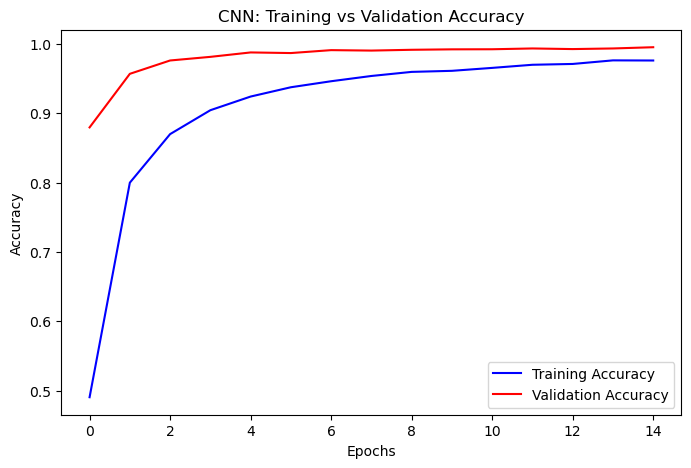

In [6]:
import matplotlib.pyplot as plt

# ✅ Plot Training vs Validation Accuracy for CNN
plt.figure(figsize=(8, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN: Training vs Validation Accuracy')
plt.legend()

plt.show()



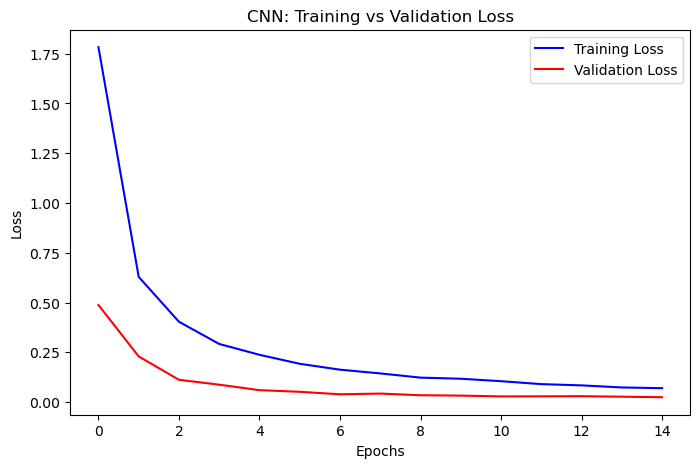

In [7]:
import matplotlib.pyplot as plt

# ✅ Plot Training vs Validation Loss for CNN
plt.figure(figsize=(8, 5))

plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN: Training vs Validation Loss')
plt.legend()

plt.show()


In [8]:
class_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}


✅ Model Loaded Successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


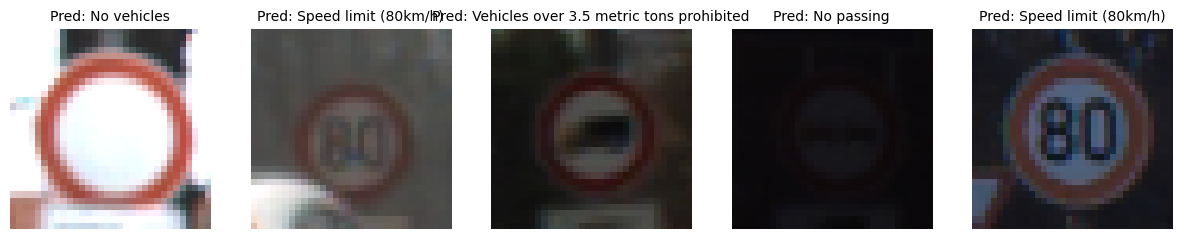

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

model_path = r"D:\DL Project\traffic_sign_cnn.h5"
model = load_model(model_path)
print("✅ Model Loaded Successfully!")

test_dir = r"D:\DL Project\archive (5)\Test"

num_images = 5
test_images = random.sample(os.listdir(test_dir), num_images)

plt.figure(figsize=(15, 5))

for i, img_name in enumerate(test_images):
    img_path = os.path.join(test_dir, img_name)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))  # Resize to match model input
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    pred = model.predict(img_array)
    predicted_class = np.argmax(pred)
    predicted_label = class_labels[predicted_class]

    plt.subplot(1, num_images, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
    plt.title(f"Pred: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


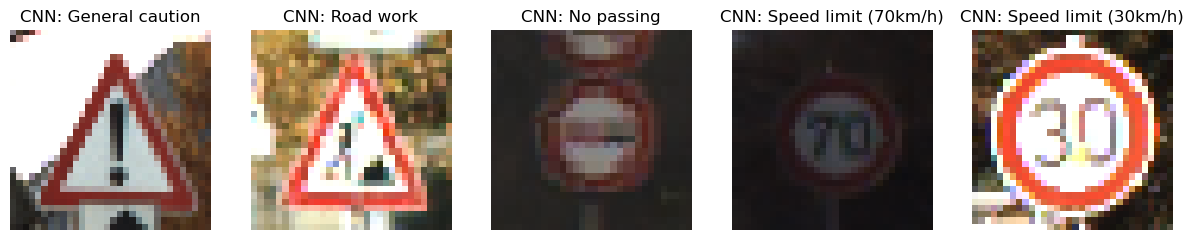

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# ✅ Load the trained CNN model
model = load_model("D:/DL Project/traffic_sign_cnn.h5")

# ✅ Test images (Ensure these paths exist)
test_images = [
    "D:/DL Project/archive (5)/Test/00006.png",
    "D:/DL Project/archive (5)/Test/00008.png",
    "D:/DL Project/archive (5)/Test/00015.png",
    "D:/DL Project/archive (5)/Test/00020.png",
    "D:/DL Project/archive (5)/Test/00024.png"
]

# ✅ Plot 5 test images
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for i, img_path in enumerate(test_images):
    img = image.load_img(img_path, target_size=(32, 32))  # Fixed image size
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand for batch
    
    # ✅ CNN Prediction
    pred_cnn = model.predict(img_array)
    predicted_class_cnn = np.argmax(pred_cnn)
    predicted_label_cnn = class_labels.get(predicted_class_cnn, "Unknown")  # Handle missing labels

    # ✅ Display Image
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"CNN: {predicted_label_cnn}")

plt.show()


In [11]:
# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("✅ Model Compiled Successfully!")


✅ Model Compiled Successfully!


In [12]:
model.save("traffic_sign_cnn.h5")
print("Model saved successfully! ✅")

Model saved successfully! ✅
